In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
test_noisy = np.load("./test_noisy_100.npy")
train_noisy = np.load("./train_noisy.npy")
train_clean = np.load("./train_clean.npy")

## Data Shape

In [3]:
print("test_noisy", test_noisy.shape)
print("train_noisy", train_noisy.shape)
print("train_clean", train_clean.shape)



test_noisy (100, 96, 96, 3)
train_noisy (10000, 96, 96, 3)
train_clean (10000, 96, 96, 3)


In [4]:
from skimage.restoration import inpaint

train_background = np.zeros(train_noisy.shape, dtype=np.uint8)


for i in range(len(train_background)):
    noisy_image = train_noisy[i]
    clean_image = train_clean[i]
    greyscale_image = np.mean(clean_image, axis=2)[...,None]

    mask = greyscale_image > 0

    ims = np.copy(noisy_image)
    mean = np.mean(ims, axis=(0,1), where=np.logical_not(mask))
    ims[mask[:,:,0]] = mean
    

    # plt.imshow(ims)
    # plt.show()


    train_background[i] = ims

np.save("train_background_2.npy", train_background)



In [24]:
example_image = train_clean[idx]
noisy_image = train_noisy[idx]

ax[0,0].imshow(example_image)

greyscale_image = np.mean(example_image, axis=2) 
binary_image = greyscale_image
binary_image[greyscale_image > 0] = 1
binary_image[np.logical_not(greyscale_image > 0)] = 0

ax[0,1].imshow(binary_image)

ax[1,0].imshow(noisy_image)

masked_noisy_image = noisy_image
masked_noisy_image[np.logical_not(greyscale_image > 0)] = np.array([0,0,0])

ax[1,1].imshow(noisy_image)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

## Binary Mask

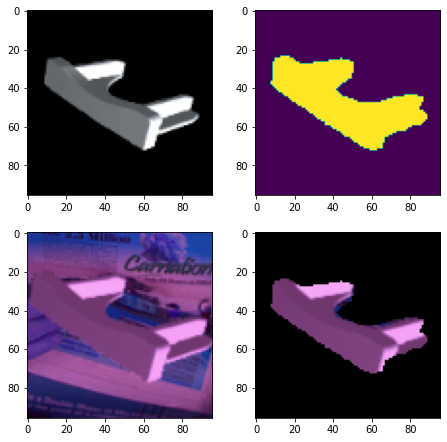

In [4]:

fig, ax = plt.subplots(2,2, figsize=(7.5,7.5))

idx = 50

example_image = train_clean[idx]
noisy_image = train_noisy[idx]

ax[0,0].imshow(example_image)

greyscale_image = np.mean(example_image, axis=2) 
binary_image = greyscale_image
binary_image[greyscale_image > 0] = 1
binary_image[np.logical_not(greyscale_image > 0)] = 0

ax[0,1].imshow(binary_image)

ax[1,0].imshow(noisy_image)

masked_noisy_image = noisy_image
masked_noisy_image[np.logical_not(greyscale_image > 0)] = np.array([0,0,0])

ax[1,1].imshow(noisy_image)

plt.show()



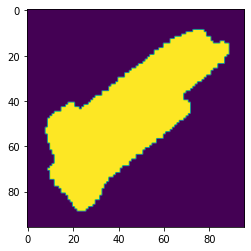

In [37]:

greyscale_image = np.mean(example_image, axis=2) 
binary_image = greyscale_image
binary_image[greyscale_image > 0] = 1
binary_image[np.logical_not(greyscale_image > 0)] = 0

plt.imshow(binary_image)
plt.show()

## test_noisy

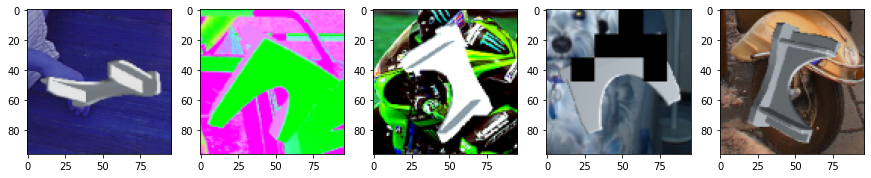

In [24]:
n = 5

fig, ax = plt.subplots(1,n, figsize=(n*3,5))
ints = np.random.randint(0, high=test_noisy.shape[0], size=n)
for i in range(n):
    ax[i].imshow(test_noisy[ints[i]])

plt.show()

## train_noisy

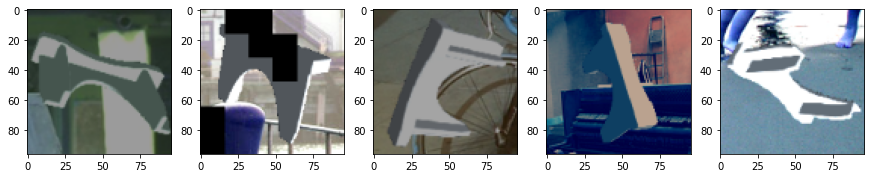

In [5]:
n = 5

fig, ax = plt.subplots(1,n, figsize=(n*3,5))
ints = np.random.randint(0, high=train_noisy.shape[0], size=n)
for i in range(n):
    ax[i].imshow(train_noisy[ints[i]])

plt.show()

## train_clean

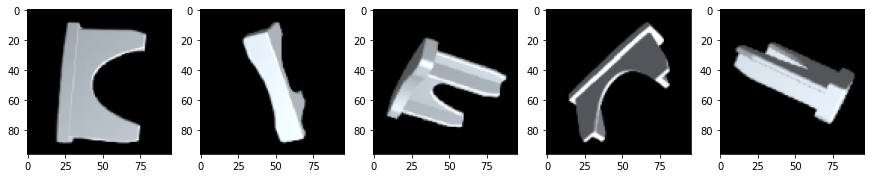

In [5]:
n = 5

fig, ax = plt.subplots(1,n, figsize=(n*3,5))
ints = np.random.randint(0, high=train_clean.shape[0], size=n)
for i in range(n):
    ax[i].imshow(train_clean[ints[i]])

plt.show()